In [236]:
# 패키지 불러오기
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [237]:
# 데이터프레임으로 데이터 불러오기
df = pd.read_csv("data/student.csv")
print(df.shape)
df.head()

(400, 7)


,gre,gpa,rank,sex,age,nationality,admission
0,380.0,3.61,3,f,19,Korea,불합격
1,660.0,3.67,3,f,18,Korea,NaN
2,800.0,4.00,1,m,19,Korea,합격
3,NaN,3.19,4,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격


In [238]:
df['nationality'].value_counts()

nationality
Korea      357
India       17
China        8
Japan        7
Vietnam      7
Mongol       4
Name: count, dtype: int64

In [239]:
# 결측치 확인
df.isnull().sum()

gre            2
gpa            2
rank           0
sex            0
age            0
nationality    0
admission      2
dtype: int64

In [240]:
# gre, gpa, admission이 결측치인 행은 삭제
df = df.dropna(subset=['gre','gpa','admission'])

In [241]:
# 결측치 확인
df.isnull().sum()

gre            0
gpa            0
rank           0
sex            0
age            0
nationality    0
admission      0
dtype: int64

In [242]:
df

,gre,gpa,rank,sex,age,nationality,admission
0,380.0,3.61,3,f,19,Korea,불합격
2,800.0,4.00,1,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격
5,760.0,3.00,2,f,19,Korea,합격
6,560.0,2.98,1,m,19,Korea,합격
...,...,...,...,...,...,...,...
394,460.0,3.99,3,m,22,Korea,합격
395,620.0,4.00,2,f,20,Korea,불합격
396,560.0,3.04,3,m,18,Korea,불합격
397,460.0,2.63,2,m,19,Korea,불합격


In [243]:
# 전처리: 진위형 변수로 변경
df["sex"] = df.sex.map({"f":0, "m":1})
df["admission"] = df.admission.map({"합격":0, "불합격":1})

In [244]:
df

,gre,gpa,rank,sex,age,nationality,admission
0,380.0,3.61,3,0,19,Korea,1
2,800.0,4.00,1,1,19,Korea,0
4,520.0,2.93,4,0,19,Korea,1
5,760.0,3.00,2,0,19,Korea,0
6,560.0,2.98,1,1,19,Korea,0
...,...,...,...,...,...,...,...
394,460.0,3.99,3,1,22,Korea,0
395,620.0,4.00,2,0,20,Korea,1
396,560.0,3.04,3,1,18,Korea,1
397,460.0,2.63,2,1,19,Korea,1


In [245]:
#원핫인코딩
df = pd.get_dummies(df)

In [246]:
df

,gre,gpa,rank,sex,age,admission,nationality_China,nationality_India,nationality_Japan,nationality_Korea,nationality_Mongol,nationality_Vietnam
0,380.0,3.61,3,0,19,1,False,False,False,True,False,False
2,800.0,4.00,1,1,19,0,False,False,False,True,False,False
4,520.0,2.93,4,0,19,1,False,False,False,True,False,False
5,760.0,3.00,2,0,19,0,False,False,False,True,False,False
6,560.0,2.98,1,1,19,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
394,460.0,3.99,3,1,22,0,False,False,False,True,False,False
395,620.0,4.00,2,0,20,1,False,False,False,True,False,False
396,560.0,3.04,3,1,18,1,False,False,False,True,False,False
397,460.0,2.63,2,1,19,1,False,False,False,True,False,False


In [247]:
#admission 열 맨 오른쪽으로 이동
cols = [col for col in df.columns if col != 'admission']
df = df[cols + ['admission']]

In [248]:
df

,gre,gpa,rank,sex,age,nationality_China,nationality_India,nationality_Japan,nationality_Korea,nationality_Mongol,nationality_Vietnam,admission
0,380.0,3.61,3,0,19,False,False,False,True,False,False,1
2,800.0,4.00,1,1,19,False,False,False,True,False,False,0
4,520.0,2.93,4,0,19,False,False,False,True,False,False,1
5,760.0,3.00,2,0,19,False,False,False,True,False,False,0
6,560.0,2.98,1,1,19,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,460.0,3.99,3,1,22,False,False,False,True,False,False,0
395,620.0,4.00,2,0,20,False,False,False,True,False,False,1
396,560.0,3.04,3,1,18,False,False,False,True,False,False,1
397,460.0,2.63,2,1,19,False,False,False,True,False,False,1


In [249]:
# Input 변수(X)와 Output 변수(y) 구분
X = np.array(df.iloc[:,:-1])
y = np.array(df['admission'])

In [250]:
X

array([[380.0, 3.61, 3, ..., True, False, False],
       [800.0, 4.0, 1, ..., True, False, False],
       [520.0, 2.93, 4, ..., True, False, False],
       ...,
       [560.0, 3.04, 3, ..., True, False, False],
       [460.0, 2.63, 2, ..., True, False, False],
       [600.0, 3.89, 3, ..., True, False, False]], dtype=object)

In [251]:
y

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [252]:
# 트레이닝 셋트와 테스트 셋트로 데이터 구분(여기서는 7:3으로 구분)
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (275, 11)
y_train 크기: (275,)
X_test 크기: (119, 11)
y_test 크기: (119,)


In [253]:
# 의사결정나무모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0) #max_depth 미지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [254]:
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0
 1 0 1 1 1 0 0 1]
실제값
 [1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1
 0 0 1 1 1 0 1 1]


In [255]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)

#원핫인코딩만 했을 때의 정확도
print('정확도: ', format(temp_acc))

정확도:  0.6218487394957983


                          gre       gpa      rank       sex       age  \
gre                  1.000000  0.384171 -0.132507 -0.047760  0.012597   
gpa                  0.384171  1.000000 -0.052761  0.116838 -0.053067   
rank                -0.132507 -0.052761  1.000000  0.039010 -0.009468   
sex                 -0.047760  0.116838  0.039010  1.000000  0.022038   
age                  0.012597 -0.053067 -0.009468  0.022038  1.000000   
nationality_China   -0.053272 -0.016287  0.001943  0.060489 -0.005401   
nationality_India   -0.003551  0.041171 -0.110039  0.020294  0.038196   
nationality_Japan    0.127071  0.070099 -0.090123  0.046871  0.042290   
nationality_Korea   -0.031224 -0.068248  0.112128 -0.044979 -0.037004   
nationality_Mongol   0.028168  0.042560  0.055213 -0.008253  0.120957   
nationality_Vietnam -0.012407  0.012762 -0.049262 -0.030236 -0.099718   
admission           -0.172838 -0.178315  0.245363  0.023114 -0.121755   

                     nationality_China  nationalit

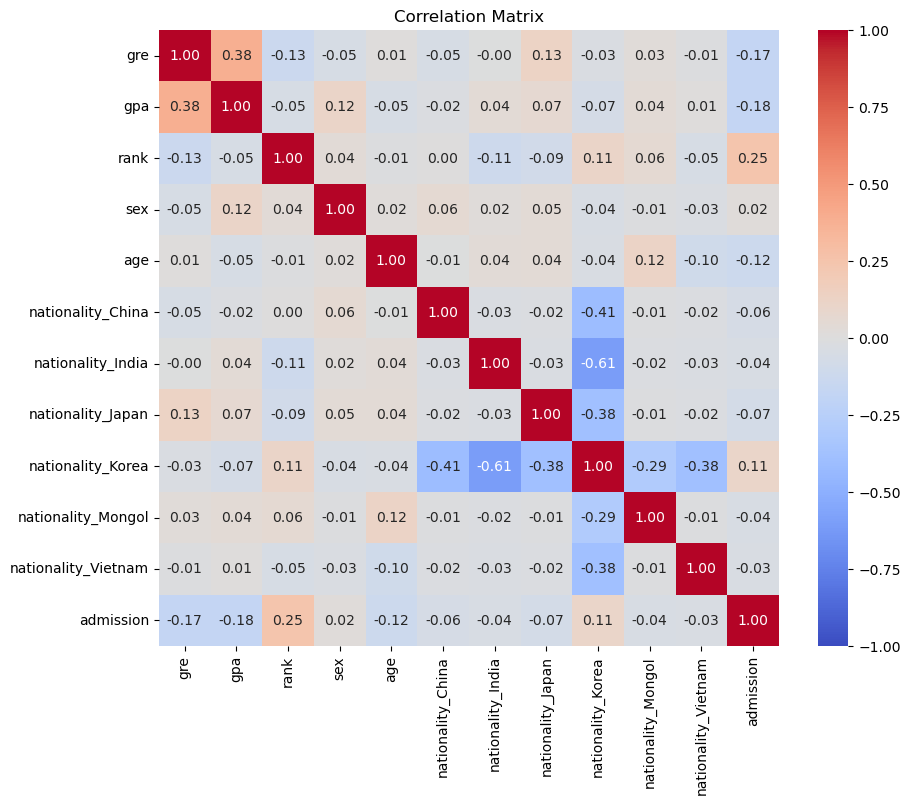

In [256]:
# 상관계수 계산
corr_matrix = df.corr()

# 상관계수 출력
print(corr_matrix)

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [259]:
#성별, 나이, 국적은 영향을 거의 끼치지 않는 것을 알 수 있음. 삭제
df = df.drop(['sex', 'age', 'nationality_China', 'nationality_India', 'nationality_Japan', 'nationality_Korea', 'nationality_Mongol', 'nationality_Vietnam'], axis=1)

In [260]:
df

,gre,gpa,rank,admission
0,380.0,3.61,3,1
2,800.0,4.00,1,0
4,520.0,2.93,4,1
5,760.0,3.00,2,0
6,560.0,2.98,1,0
...,...,...,...,...
394,460.0,3.99,3,0
395,620.0,4.00,2,1
396,560.0,3.04,3,1
397,460.0,2.63,2,1


In [261]:
# Input 변수(X)와 Output 변수(y) 구분
X = np.array(df.iloc[:,:-1])
y = np.array(df['admission'])

In [262]:
# 트레이닝 셋트와 테스트 셋트로 데이터 구분(여기서는 7:3으로 구분)
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (275, 3)
y_train 크기: (275,)
X_test 크기: (119, 3)
y_test 크기: (119,)


In [263]:
# 의사결정나무모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0) #max_depth 미지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [264]:
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 0 1]
실제값
 [1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1
 0 0 1 1 1 0 1 1]


In [265]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)

#원핫인코딩, 상관계수 했을 때의 정확도
print('정확도: ', format(temp_acc))

정확도:  0.6386554621848739


In [266]:
#아주 조금 상승하였다.

In [267]:
train_scores, test_scores = list(), list()
# train_score와 test_score의 정확도를 저장 장소
# train_score는 훈련데이터에 특화될수록 증가
# test_score는 테스트데이터에 일반화될수록 증가

In [268]:
# 의사결정나무모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier

#의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    df = DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 의사결정나무 모델 적합
    df.fit(X_train, y_train)
    
    #training dataset 정확도 평가
    train_att = df.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att = df.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.698, test: 0.639
>2, train: 0.716, test: 0.664
>3, train: 0.724, test: 0.664
>4, train: 0.760, test: 0.681
>5, train: 0.785, test: 0.655
>6, train: 0.822, test: 0.630
>7, train: 0.855, test: 0.588
>8, train: 0.902, test: 0.622
>9, train: 0.938, test: 0.605
>10, train: 0.960, test: 0.605
>11, train: 0.971, test: 0.622
>12, train: 0.975, test: 0.630
>13, train: 0.985, test: 0.655
>14, train: 0.989, test: 0.639
>15, train: 0.989, test: 0.647
>16, train: 0.993, test: 0.630
>17, train: 0.993, test: 0.647
>18, train: 0.993, test: 0.630
>19, train: 0.993, test: 0.655


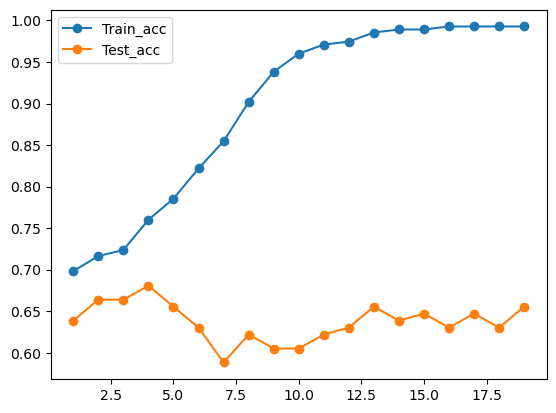

In [270]:
#그래프 그리기

from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()

#최적의 의사결정나무 깊이는? 4

In [271]:
#의사결정나무의 깊이를 설정하여 재학습
#파라미터(max_depth)에 최적깊이 값 부여

tree = DecisionTreeClassifier(random_state=0, max_depth=4) #max_depth 4로 지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [272]:
#모델 성능 평가
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
실제값
 [1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1
 0 0 1 1 1 0 1 1]


In [275]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)
# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함.

#원핫인코딩, 상관계수, 의사결정나무 깊이 최적화했을 때의 정확도
print('정확도: ', format(temp_acc))

정확도:  0.680672268907563


In [274]:
#조금 더 상승하였다.
#60211356 장유진